In [1]:
import os

# Path to your dataset folder
dataset_path = "dataset"

# Collect paths of all 1.jpg (shirt images) and their corresponding 0.jpg
shirt_image_paths = []
model_image_paths = []

for root, dirs, files in os.walk(dataset_path):
    for dir_name in dirs:
        shirt_path = os.path.join(root, dir_name, "1.jpg")
        model_path = os.path.join(root, dir_name, "0.jpg")
        if os.path.exists(shirt_path) and os.path.exists(model_path):
            shirt_image_paths.append(shirt_path)
            model_image_paths.append(model_path)

# Print the number of shirt images found
print(f"Found {len(shirt_image_paths)} shirt images.")

Found 100 shirt images.


In [2]:
import cv2
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

# Load pre-trained ResNet50 model
model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

# Function to preprocess an image
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224))  # Resize for ResNet
    img = img / 255.0  # Normalize
    return img

# Function to extract features
def extract_features(img):
    img = preprocess_input(img)  # ResNet-specific preprocessing
    features = model.predict(np.expand_dims(img, axis=0))
    return features.flatten()

# Precompute features for all shirt images
shirt_features = []
for shirt_path in shirt_image_paths:
    img = preprocess_image(shirt_path)
    features = extract_features(img)
    shirt_features.append(features)

# Convert to numpy array for easier handling
shirt_features = np.array(shirt_features)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [3]:
from sklearn.metrics.pairwise import cosine_similarity

def find_similar_shirts(query_image_path, shirt_features, shirt_image_paths, model_image_paths, top_k=5):
    # Extract features from query image
    query_img = preprocess_image(query_image_path)
    query_features = extract_features(query_img)

    # Compute similarities
    similarities = cosine_similarity([query_features], shirt_features)[0]

    # Get indices of top matches
    top_indices = np.argsort(similarities)[-top_k:][::-1]

    # Return paths of similar shirts and corresponding model images
    similar_shirts = [shirt_image_paths[idx] for idx in top_indices]
    similar_models = [model_image_paths[idx] for idx in top_indices]

    return similar_shirts, similar_models

# Example usage
query_shirt = "shirt.jpg"  # Replace with your query shirt image path
similar_shirts, similar_models = find_similar_shirts(query_shirt, shirt_features, shirt_image_paths, model_image_paths, top_k=5)

# Print the paths of similar shirts and corresponding model images
print("Top similar shirts:")
for shirt in similar_shirts:
    print(shirt)

print("\nCorresponding model images:")
for model in similar_models:
    print(model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
Top similar shirts:
dataset\100002074\1.jpg
dataset\100786280\1.jpg
dataset\100963093\1.jpg
dataset\100010727\1.jpg
dataset\100926139\1.jpg

Corresponding model images:
dataset\100002074\0.jpg
dataset\100786280\0.jpg
dataset\100963093\0.jpg
dataset\100010727\0.jpg
dataset\100926139\0.jpg


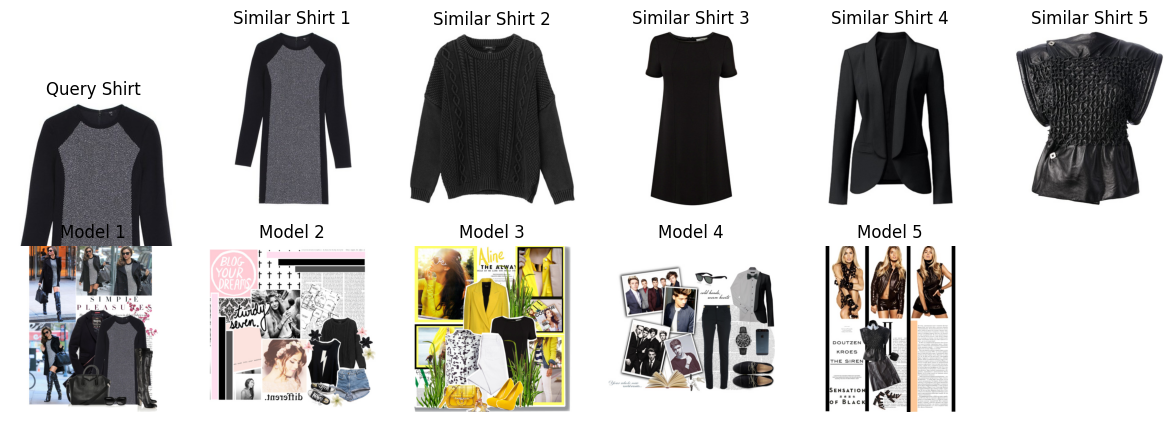

In [4]:
import matplotlib.pyplot as plt

def display_results(query_image_path, similar_shirts, similar_models):
    # Load and display the query image
    query_img = cv2.imread(query_image_path)
    query_img = cv2.cvtColor(query_img, cv2.COLOR_BGR2RGB)  # Convert to RGB for display

    plt.figure(figsize=(15, 5))
    plt.subplot(1, len(similar_shirts) + 1, 1)
    plt.title("Query Shirt")
    plt.imshow(query_img)
    plt.axis('off')

    # Display similar shirts and corresponding model images
    for i, (shirt, model) in enumerate(zip(similar_shirts, similar_models)):
        shirt_img = cv2.imread(shirt)
        shirt_img = cv2.cvtColor(shirt_img, cv2.COLOR_BGR2RGB)

        model_img = cv2.imread(model)
        model_img = cv2.cvtColor(model_img, cv2.COLOR_BGR2RGB)

        # Display similar shirt
        plt.subplot(2, len(similar_shirts) + 1, i + 2)
        plt.title(f"Similar Shirt {i + 1}")
        plt.imshow(shirt_img)
        plt.axis('off')

        # Display corresponding model image
        plt.subplot(2, len(similar_shirts) + 1, i + len(similar_shirts) + 2)
        plt.title(f"Model {i + 1}")
        plt.imshow(model_img)
        plt.axis('off')

    plt.show()

# Display the query shirt, similar shirts, and corresponding model images
display_results(query_shirt, similar_shirts, similar_models)